## Ejemplo práctico: Entrenamiento del modelo

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1) Crear datos de ejemplo
datos = pd.DataFrame({
    "Horas_Estudio": [1, 2, 3, 4, 5],
    "Calificacion":  [45, 50, 65, 70, 85]
})

# 2) Separar variables
X = datos[["Horas_Estudio"]]
y = datos["Calificacion"]

# 3) Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# 4) Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5) Ver coeficientes del modelo
print("Intercepto (β0):", modelo.intercept_)
print("Coeficiente (β1):", modelo.coef_[0])

# 6) Predicción
y_pred = modelo.predict(X_test)

# 7) Métricas: R² (explícito) y MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nR² (calculado con y_real vs y_pred):", r2)
print("MAE:", mae)

Intercepto (β0): 37.14285714285715
Coeficiente (β1): 8.57142857142857

R² (calculado con y_real vs y_pred): 0.9291961682632236
MAE: 4.642857142857146


In [3]:
# 8) Realizar predicción para 3.5 horas de estudio
horas_nuevas = pd.DataFrame({"Horas_Estudio": [3.5]})
calificacion_predicha = modelo.predict(horas_nuevas)
print(f"Calificación predicha para 3.5 horas: {calificacion_predicha[0]:.2f}")

Calificación predicha para 3.5 horas: 67.14


## Live Coding 1

1. Generar y Cargar dataset (auto-mpg.csv)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

cols_num = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin"
]

# Lee 8 columnas por espacios + todo lo demás como el nombre (puede venir con espacios)
df = pd.read_csv(
    url,
    sep=r"\s+",
    names=cols_num + ["car_name"],
    na_values="?",
    engine="python",
    usecols=list(range(9)),          # asegura 9 columnas: 8 + 1 (resto)
    skipinitialspace=True
)

# Limpieza extra: quitar comillas si aparecen
df["car_name"] = df["car_name"].astype(str).str.strip().str.strip('"')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford


| Campo         | Tipo (en df.info) | ¿Qué representa? | Unidad / valores típicos | Nota rápida |
|--------------|-------------------|------------------|--------------------------|-------------|
| mpg          | float64           | Eficiencia de combustible | millas/galón | **Target**: más alto = más eficiente |
| cylinders    | int64             | Nº de cilindros del motor | 3, 4, 5, 6, 8 | Más cilindros suele bajar mpg |
| displacement | float64           | Tamaño del motor (cilindrada) | pulgadas cúbicas (cu in) | Motor más grande suele bajar mpg |
| horsepower   | float64           | Potencia del motor | HP | Tiene **6 nulos** en tu df |
| weight       | float64           | Peso del vehículo | libras (lb) | Más peso suele bajar mpg |
| acceleration | float64           | Aceleración (tiempo) | segundos (0–60 mph aprox.) | Menor tiempo = más rápido |
| model_year   | int64             | Año del modelo | 70–82 | Autos más nuevos tienden a ser más eficientes |
| origin       | int64             | Origen del auto | 1=USA, 2=Europa, 3=Japón | En ML conviene tratarlo como categórica |
| car_name     | object            | Nombre/modelo del auto | texto | Usualmente se elimina o se procesa aparte |

¿Cómo cambia la eficiencia de combustible (MPG) cuando cambia el peso del vehículo?

En términos técnicos:
* Variable objetivo (y): mpg
* Variable predictora (X): weight

Sabemos, casi por física básica, que:

Más peso → más energía necesaria → más combustible → menor MPG

Entonces esperamos que el coeficiente β₁ sea:
* Negativo
* Estadísticamente coherente
* Interpretable

2. Inspeccionar variables y limpiar valores faltantes


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

3. Dividir en variables predictoras (X) y objetivo (y)

In [8]:
X = df[["weight"]]
y = df["mpg"]

4. Separar en train y test (80/20)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Entrenar con LinearRegression()

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
print("Intercepto:", model.intercept_)
print("Coeficiente (peso):", model.coef_[0])

Intercepto: 46.78206336645047
Coeficiente (peso): -0.007805242351594879


6. Visualizar recta de regresión

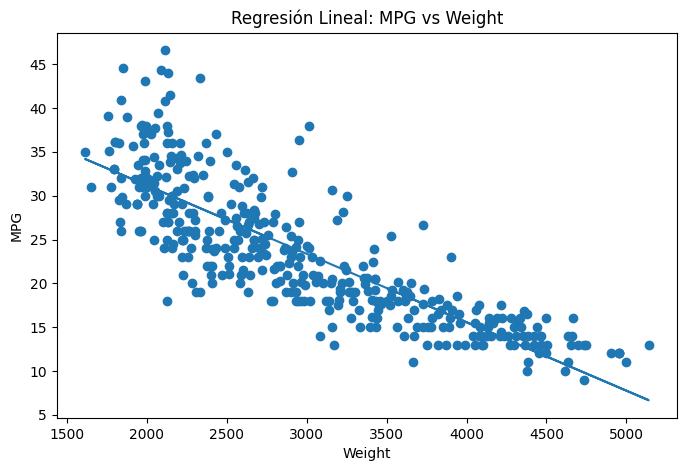

In [12]:
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Regresión Lineal: MPG vs Weight")
plt.show()

¿Qué observan?
¿La relación parece lineal?

1. Relación claramente negativa: A mayor peso → menor MPG
    Eso ya valida la intuición física.

2. La relación parece bastante lineal: No vemos una curva clara.
    La tendencia dominante es lineal decreciente.

3. Hay dispersión alrededor de la recta
   * Peso explica parte del MPG…
   * pero claramente no todo.

7. Evaluar con R² y MAE

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error

y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("R2:", r2)
print("MAE:", mae)

R2: 0.722971057303075
MAE: 3.1177861992064573


8. Interpretar el coeficiente de regresión

* ¿Qué significa R² = 0.72?
    El modelo explica aproximadamente el 72% de la variabilidad del MPG usando solo el peso.
    
    El peso es un predictor fuerte del consumo, pero no lo explica todo.

* ¿Qué significa MAE = 3.12?

    En promedio, el modelo se equivoca en:≈ 3.1 millas por galón.

* ¿Ese error es grande o pequeño? ... Depende del contexto.

    Si el rango del MPG va de: ~10 a ~45

    Un error promedio de 3 puede ser razonable.

La regresión lineal logró capturar gran parte del comportamiento del MPG usando solo el peso. Sin embargo, el 28% de la variabilidad sigue sin explicarse, lo que sugiere que existen otros factores relevantes.

9. Aplicamos Cross-Validation (k=5)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

# Validación cruzada con 5 folds
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("R2 por fold:", r2_scores)
print("R2 promedio:", np.mean(r2_scores))
print("Desviación estándar:", np.std(r2_scores))

R2 por fold: [ 0.43423842  0.35261673  0.79584633  0.68501427 -0.7082704 ]
R2 promedio: 0.31188907099100277
Desviación estándar: 0.5349374725542042


Primero: Tu split 80/20 dio R² ≈ 0.72.

Pero la validación cruzada dice:

* R² promedio ≈ 0.31
* Desviación estándar ≈ 0.53
* Un fold con R² negativo (-0.70)
(R² negativo significa:El modelo predice peor que simplemente usar la media.)

**Interpretación**

* El modelo no es estable.

* Funciona bien en algunos subconjuntos, pero muy mal en otros.

Eso puede indicar:
1. Alta sensibilidad a la distribución de los datos
2. Posible heterogeneidad en el dataset
3. Relación no perfectamente lineal
4. Que el train/test 80/20 fue “optimista”

Un solo split puede engañar.

La validación cruzada revela estabilidad o fragilidad.

Un modelo puede verse sólido en un split, pero inestable cuando se evalúa de forma más rigurosa.

10. K-Fold Cross Validation (Usa KFold con shuffle=True)

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(r2_scores)
print("Promedio:", r2_scores.mean())
print("Std:", r2_scores.std())

[0.72297106 0.68883619 0.69029271 0.66528104 0.68379237]
Promedio: 0.690234672169334
Std: 0.018643054021819355


¿Qué pasó entonces?

Antes se uso KFold sin shuffle=True.

Eso significa que el dataset se dividió por bloques, respetando el orden original.

Y este dataset está ordenado por año/modelo.

Entonces probablemente ocurrió algo como esto:

* Fold 1 → autos antiguos
* Fold 2 → mezcla
* Fold 3 → más nuevos
* Fold 4 → otra mezcla
* Fold 5 → extremos

Eso rompe la homogeneidad entre folds.

No porque el dataset esté estratificado. Sino porque está ordenado.

El problema no era el modelo.

Era la forma en que dividimos los datos.

Cuando se activo shuffle=True:

* Las observaciones se distribuyeron aleatoriamente
* Cada fold tuvo mezcla representativa
* El rendimiento se estabilizó

Y ahora el promedio (0.69) está muy cerca del 80/20 original (~0.72).

Eso es coherente.

10. Conclusiones

La regresión lineal simple utilizando únicamente el peso del vehículo como predictor logra explicar aproximadamente el 69% de la variabilidad del MPG, y lo hace de forma estable cuando se evalúa mediante validación cruzada con barajado de datos. Esto confirma que el peso es un factor estructuralmente relevante en la eficiencia de combustible, aunque no la explica por completo. Además, la comparación entre distintos esquemas de validación demuestra que la forma en que dividimos los datos influye directamente en la percepción del desempeño del modelo. En consecuencia, no solo importa el algoritmo, sino también la estrategia de evaluación utilizada para estimar su capacidad de generalización.

El modelo simple MPG ~ Weight:

* Tiene R² ≈ 0.69 en promedio
* Es estable (std ≈ 0.018 es muy bajo)
* Generaliza razonablemente bien

## Ejercicio 1

1. Cargar el dataset bicicletas.csv



In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 250

peso = np.random.normal(12, 1.5, n)  # kg
tamano_cuadro = np.random.choice(["S", "M", "L"], n)
marchas = np.random.choice([7, 14, 18, 21, 24], n)
tipo = np.random.choice(["Ruta", "Montaña", "Urbana"], n)

# Relación de precio simulada
precio = (
    300
    + peso * -20
    + marchas * 25
    + np.where(tipo == "Montaña", 400, 0)
    + np.where(tipo == "Ruta", 600, 0)
    + np.random.normal(0, 150, n)
)

df = pd.DataFrame({
    "precio": precio.round(2),
    "peso": peso.round(2),
    "tamano_cuadro": tamano_cuadro,
    "marchas": marchas,
    "tipo": tipo
})

df.head()

,precio,peso,tamano_cuadro,marchas,tipo
0,965.69,12.75,S,21,Ruta
1,527.46,11.79,S,14,Montaña
2,880.49,12.97,S,21,Montaña
3,1108.64,14.28,S,21,Montaña
4,1005.50,11.65,L,24,Urbana


2. Explorar y limpiar los datos si es necesario

In [17]:
df["tipo"].value_counts()

tipo
Ruta       89
Urbana     83
Montaña    78
Name: count, dtype: int64

In [18]:
df["tamano_cuadro"].value_counts()

tamano_cuadro
S    103
L     75
M     72
Name: count, dtype: int64

3. Definir X (variables predictoras) & y (precio)

In [19]:
X = df.drop("precio", axis=1)
y = df["precio"]

4. Separar en conjunto de entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Entrenar el modelo con LinearRegression

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

num_cols = ["peso", "marchas"]
cat_cols = ["tamano_cuadro", "tipo"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols) # drop="first" De cada grupo de categorías, una se elimina y se convierte en referencia.
    # Para evitar problemas de colinealidad.
])
#Pipeline significa:
# Paso 1 → Transformar
# Paso 2 → Entrenar modelo
model = Pipeline([
    ("prep", preprocess),
    ("reg", LinearRegression())
])

In [22]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

6. Obten e interpreta los coeficientes

In [23]:
coef = model.named_steps["reg"].coef_  # Extraer los coeficientes del modelo
feature_names = model.named_steps["prep"].get_feature_names_out() # Obtener los nombres reales de las variables
pd.Series(coef, index=feature_names).sort_values() # Unir coeficientes con nombres

cat__tipo_Urbana       -388.003726
num__peso               -32.086484
cat__tamano_cuadro_M     27.132087
cat__tamano_cuadro_S     37.058243
num__marchas            154.702662
cat__tipo_Ruta          200.173521
dtype: float64

In [24]:
intercepto = model.named_steps["reg"].intercept_
print("Intercepto:", intercepto)

Intercepto: 867.5364104464762


In [25]:
print("Intercepto:", intercepto)

for name, c in zip(feature_names, coef):
    print(f"{name}: {c}")

Intercepto: 867.5364104464762
num__peso: -32.08648367653515
num__marchas: 154.70266183845084
cat__tamano_cuadro_M: 27.132087351540576
cat__tamano_cuadro_S: 37.058243081717535
cat__tipo_Ruta: 200.1735212039878
cat__tipo_Urbana: -388.00372627306496


7. Realiza predicciones sobre el set de prueba

In [26]:
y_pred = model.predict(X_test)

8. Evalúa el rendimiento con R² y MAE

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2:", r2)
print("MAE:", mae)

R2: 0.7656410376806493
MAE: 126.17784347474714


9. Visualiza precios reales v/s predichos

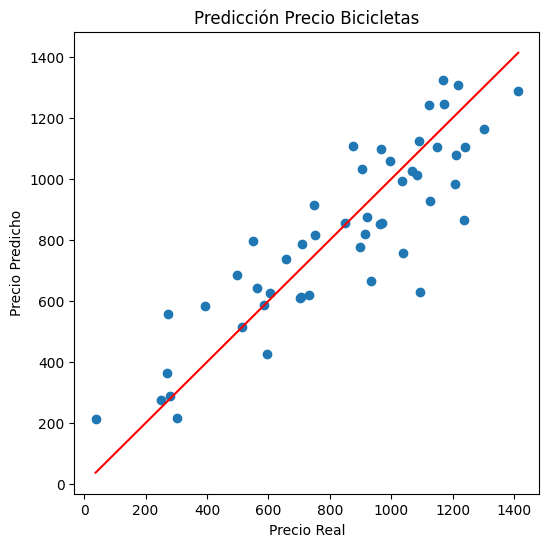

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción Precio Bicicletas")
plt.show()

10. Reflexión: ¿el modelo es útil para el negocio?

R² = 0.756

Eso significa que el modelo explica aproximadamente el 75.6% de la variabilidad del precio.

En términos simples:

El 75% del comportamiento del precio se puede explicar por peso, marchas, tipo y tamaño.

MAE = 126.17

Aquí está lo realmente interesante.

El MAE es el error promedio absoluto.

Eso significa:

En promedio, te equivocas en aproximadamente 126 unidades monetarias.

**¿Es 126 mucho o poco?**

In [29]:
y.min(), y.max()

(np.float64(37.07), np.float64(1634.96))

Rango de precios:
1634.96 - 37.07 = 1597.89

Error promedio:
126.18

proporción del rango total : 126.18/1597.89 = 0.079 => 7.9%

In [30]:
y.mean()

np.float64(829.96204)

126.18 / 829.96 = 15.20%

En promedio, el modelo se equivoca en 15% del precio promedio.



11. Validación Cruzada

In [31]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

print("R2 por fold:", r2_scores)
print("R2 promedio:", np.mean(r2_scores))
print("Desviación estándar:", np.std(r2_scores))

R2 por fold: [0.76564104 0.83433052 0.66197539 0.76432911 0.73154396]
R2 promedio: 0.7515640052638861
Desviación estándar: 0.055925538302233985


1. El promedio es casi igual al R² que obtuviste antes (~0.75).
Eso significa que tu train/test inicial no fue suerte.

2. No hay ningún fold negativo.
Eso es buena señal. El modelo generaliza.

3. La desviación estándar es baja (~0.056).
Eso indica estabilidad. No está cambiando dramáticamente según la partición.

In [32]:
mae_scores = -cross_val_score(
    model, X, y,
    cv=kf,
    scoring="neg_mean_absolute_error"
)

print("MAE por fold:", mae_scores)
print("MAE promedio:", np.mean(mae_scores))
print("Desviación estándar:", np.std(mae_scores))

MAE por fold: [126.17784347 116.62049016 147.74479912 136.32672611 125.76081259]
MAE promedio: 130.52613429321215
Desviación estándar: 10.631200745281717


1. El error es consistente

La desviación estándar (~10)

 es baja respecto al promedio (~130).

Eso significa:

* El modelo no se comporta dramáticamente distinto según la partición.
* Es estable.

2. El error relativo sigue siendo ~15%

Recordando que el precio promedio era ~830.
* 130/830≈15.6%

Eso confirma lo que ya habíamos visto.

El modelo predice con un error promedio cercano al 15%.

3. Fold 3 tuvo mayor error (~147)

* Pero no es extremo.
* No hay fold donde el error se dispare.
* Eso es buena señal de generalización.

**Conclusión global**

El modelo de regresión lineal múltiple logra explicar aproximadamente el 75% de la variabilidad del precio de las bicicletas y lo hace de manera estable bajo validación cruzada, lo que confirma que no depende de una partición específica de los datos. El error promedio se sitúa en torno a 130 unidades monetarias, equivalente a cerca del 15% del precio promedio, lo que indica que el modelo captura bien la estructura general del problema, aunque aún existe variabilidad no explicada. En términos prácticos, el modelo es útil para estimaciones razonables y análisis comparativos, pero podría perfeccionarse incorporando variables adicionales o técnicas más complejas si se requiere mayor precisión.

## PARTE 2

## Análisis de residuos

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1) Crear datos de ejemplo
datos = pd.DataFrame({
    "Horas_Estudio": [1, 2, 3, 4, 5],
    "Calificacion":  [45, 50, 65, 70, 85]
})

# 2) Separar variables
X = datos[["Horas_Estudio"]]
y = datos["Calificacion"]

# 3) Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# 4) Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5) Ver coeficientes del modelo
print("Intercepto (β0):", modelo.intercept_)
print("Coeficiente (β1):", modelo.coef_[0])

# 6) Predicción
y_pred = modelo.predict(X_test)

# 7) Métricas: R² (explícito) y MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nR² (calculado con y_real vs y_pred):", r2)
print("MAE:", mae)

Intercepto (β0): 37.14285714285715
Coeficiente (β1): 8.57142857142857

R² (calculado con y_real vs y_pred): 0.9291961682632236
MAE: 4.642857142857146


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predicciones sobre TODO el dataset (más pedagógico que solo test)
y_pred_total = modelo.predict(X)

# Calcular residuos
residuos = y - y_pred_total

# Crear DataFrame para visualizar
df_res = pd.DataFrame({
    "Horas_Estudio": X["Horas_Estudio"],
    "y_real": y,
    "y_pred": y_pred_total,
    "residuo": residuos
})

print(df_res)

   Horas_Estudio  y_real     y_pred   residuo
0              1      45  45.714286 -0.714286
1              2      50  54.285714 -4.285714
2              3      65  62.857143  2.142857
3              4      70  71.428571 -1.428571
4              5      85  80.000000  5.000000


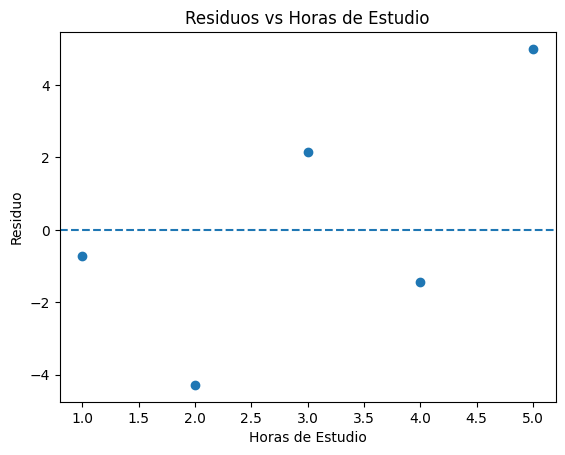

In [35]:
plt.scatter(X, residuos)
plt.axhline(0, linestyle="--")
plt.xlabel("Horas de Estudio")
plt.ylabel("Residuo")
plt.title("Residuos vs Horas de Estudio")
plt.show()

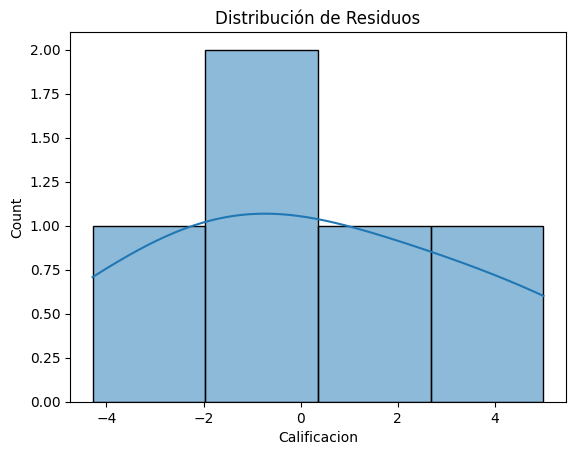

In [36]:
sns.histplot(residuos, kde=True)
plt.title("Distribución de Residuos")
plt.show()

## Ejemplo práctico: Comparación de modelos

In [37]:
# Comparación de modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
# Modelo lineal
modelo_lineal = LinearRegression()
mse_lineal = -cross_val_score(modelo_lineal, X, y, cv=5, scoring='neg_mean_squared_error')
# Modelo polinómico
modelo_poli = Pipeline([    ('poly', PolynomialFeatures(degree=2)),
                            ('linear', LinearRegression())])
mse_poli = -cross_val_score(modelo_poli, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE modelo lineal: {np.mean(mse_lineal):.2f}")
print(f"MSE modelo polinómico: {np.mean(mse_poli):.2f}")

MSE modelo lineal: 18.60
MSE modelo polinómico: 24.18


## Ejemplo Regresión lineal simple

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Datos ficticios
datos = pd.DataFrame({
    "Publicidad_millones": [1, 2, 3, 4, 5, 6],
    "Ventas_millones":      [15, 18, 25, 28, 35, 40]
})

X = datos[["Publicidad_millones"]]
y = datos["Ventas_millones"]

modelo = LinearRegression()
modelo.fit(X, y)

print("Intercepto (β0):", modelo.intercept_)
print("Pendiente (β1):", modelo.coef_[0])

Intercepto (β0): 8.933333333333326
Pendiente (β1): 5.114285714285716


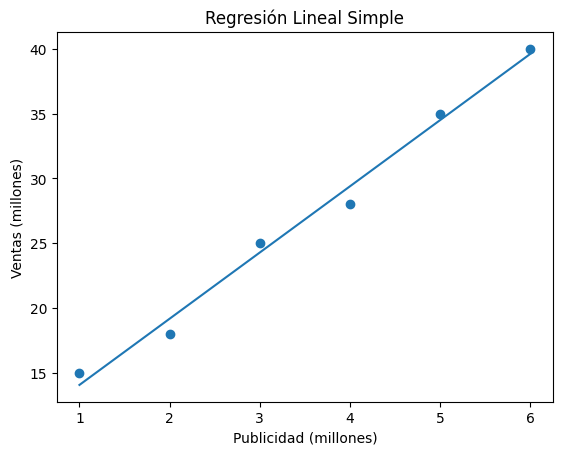

In [39]:
y_pred = modelo.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Publicidad (millones)")
plt.ylabel("Ventas (millones)")
plt.title("Regresión Lineal Simple")
plt.show()

In [40]:
nueva_inversion = pd.DataFrame({"Publicidad_millones": [7]})
venta_estimada = modelo.predict(nueva_inversion)
print(f"Ventas esperadas para 7 millones en publicidad: {venta_estimada[0]:.2f}")

Ventas esperadas para 7 millones en publicidad: 44.73


## Regresión lineal múltiple

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Datos de ejemplo (casas) ---
datos = pd.DataFrame({
    "Metros2": [60, 80, 100, 120, 150, 200],
    "Habitaciones": [2, 2, 3, 3, 4, 5],
    "Antiguedad": [20, 15, 10, 8, 5, 2],
    "Precio": [90, 120, 150, 170, 210, 300]
})

X = datos[["Metros2", "Habitaciones", "Antiguedad"]]
y = datos["Precio"]

# 1) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Pipeline (escalado + modelo)
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# 3) Entrenar
pipe.fit(X_train, y_train)

# 4) Predecir y evaluar
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

# 5) Ver coeficientes (OJO: son sobre variables escaladas)
modelo_lr = pipe.named_steps["model"]
print("Intercepto:", modelo_lr.intercept_)
print("Coeficientes (sobre X escalada):", modelo_lr.coef_)

# 6) Predicción nueva (sin warning, con nombres correctos)
nueva_casa = pd.DataFrame({
    "Metros2": [110],
    "Habitaciones": [3],
    "Antiguedad": [7]
})

precio_estimado = pipe.predict(nueva_casa)
print("Precio estimado:", precio_estimado[0])

R²: -25.722
MAE: 72.500
RMSE: 77.540
Intercepto: 207.5
Coeficientes (sobre X escalada): [94.16574483  8.29156198 45.4663337 ]
Precio estimado: 130.0


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=3, scoring="r2")
print("R² promedio CV:", scores.mean())

R² promedio CV: -8.99971259971492


## Ejemplo: Regresión polinómica

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
temperatura = np.array([5, 8, 12, 15, 18, 22, 25, 30, 35])
consumo = np.array([300, 250, 200, 180, 170, 190, 220, 280, 350])

datos = pd.DataFrame({
    "Temperatura": temperatura,
    "Consumo": consumo
})
datos

,Temperatura,Consumo
0,5,300
1,8,250
2,12,200
3,15,180
4,18,170
5,22,190
6,25,220
7,30,280
8,35,350


In [44]:
from sklearn.linear_model import LinearRegression

X = datos[["Temperatura"]]
y = datos["Consumo"]

modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)

y_pred_lineal = modelo_lineal.predict(X)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

modelo_polinomico = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

modelo_polinomico.fit(X, y)
y_pred_poly = modelo_polinomico.predict(X)

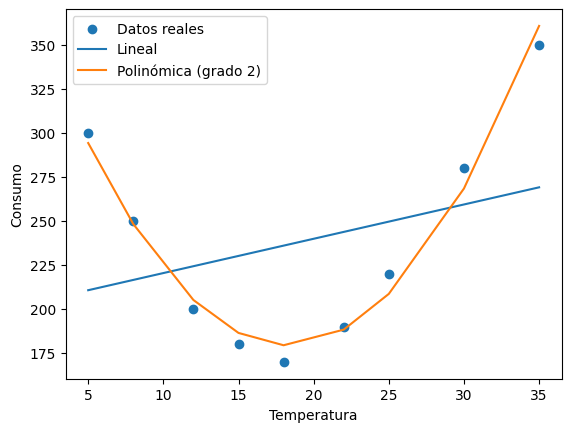

In [46]:
plt.scatter(X, y, label="Datos reales")
plt.plot(X, y_pred_lineal, label="Lineal")
plt.plot(X, y_pred_poly, label="Polinómica (grado 2)")
plt.xlabel("Temperatura")
plt.ylabel("Consumo")
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score

print("R² Lineal:", r2_score(y, y_pred_lineal))
print("R² Polinómica:", r2_score(y, y_pred_poly))

R² Lineal: 0.10059928426655707
R² Polinómica: 0.9810530356367204


## Regresión Ridge

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

datos = pd.DataFrame({
    "Metros2": [60, 80, 100, 120, 150, 200, 220, 250],
    "Habitaciones": [2, 2, 3, 3, 4, 5, 5, 6],
    "Antiguedad": [20, 15, 10, 8, 5, 2, 1, 1],
    "Precio": [90, 120, 150, 170, 210, 300, 330, 380]
})

X = datos[["Metros2", "Habitaciones", "Antiguedad"]]
y = datos["Precio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [49]:
from sklearn.linear_model import Ridge

modelo_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

modelo_ridge.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None


In [50]:
y_pred = modelo_ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MAE:", mae)

R²: 0.9895671776214642
MAE: 6.615604328924661


In [51]:
ridge_model = modelo_ridge.named_steps["ridge"]

print("Intercepto:", ridge_model.intercept_)
print("Coeficientes Ridge:", ridge_model.coef_)

Intercepto: 221.66666666666666
Coeficientes Ridge: [ 42.71151489  38.7643404  -14.4756203 ]


## Regresión Lasso

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Dataset ampliado
datos = pd.DataFrame({
    "Metros2": [60, 80, 100, 120, 150, 200, 220, 250],
    "Habitaciones": [2, 2, 3, 3, 4, 5, 5, 6],
    "Antiguedad": [20, 15, 10, 8, 5, 2, 1, 1],
    "DistanciaMetro": [800, 600, 400, 300, 200, 150, 100, 80],
    "ColorCasa": [1, 0, 1, 1, 0, 1, 0, 1],  # variable irrelevante ficticia
    "Precio": [90, 120, 150, 170, 210, 300, 330, 380]
})

X = datos.drop(columns="Precio")
y = datos["Precio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [53]:
modelo_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.5))
])

modelo_lasso.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('lasso', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True


In [54]:
y_pred = modelo_lasso.predict(X_test)

print("R²:", r2_score(y_test, y_pred))

R²: 0.9948069867073029


In [55]:
lasso_model = modelo_lasso.named_steps["lasso"]

coeficientes = pd.Series(
    lasso_model.coef_,
    index=X.columns
)

print(coeficientes)

Metros2           105.261554
Habitaciones        0.499610
Antiguedad          0.000000
DistanciaMetro      4.172614
ColorCasa           2.796938
dtype: float64


## Regresión ElasticNet

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

datos = pd.DataFrame({
    "Metros2": [60, 80, 100, 120, 150, 200, 220, 250],
    "Habitaciones": [2, 2, 3, 3, 4, 5, 5, 6],
    "Antiguedad": [20, 15, 10, 8, 5, 2, 1, 1],
    "DistanciaMetro": [800, 600, 400, 300, 200, 150, 100, 80],
    "ColorCasa": [1, 0, 1, 1, 0, 1, 0, 1],  # ruido
    "Precio": [90, 120, 150, 170, 210, 300, 330, 380]
})

X = datos.drop(columns="Precio")
y = datos["Precio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [57]:
modelo_elastic = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(alpha=0.5, l1_ratio=0.5))
])

modelo_elastic.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('elastic', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.5
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False


In [58]:
y_pred = modelo_elastic.predict(X_test)

print("R²:", r2_score(y_test, y_pred))

R²: 0.9863732609327055


In [59]:
elastic_model = modelo_elastic.named_steps["elastic"]

coeficientes = pd.Series(
    elastic_model.coef_,
    index=X.columns
)

print(coeficientes)

Metros2           37.821505
Habitaciones      35.179775
Antiguedad       -13.704158
DistanciaMetro    -8.314941
ColorCasa          2.136076
dtype: float64


## Regresión con árboles de decisión

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temperatura = np.array([5, 8, 12, 15, 18, 22, 25, 30, 35])
consumo = np.array([300, 250, 200, 180, 170, 190, 220, 280, 350])

datos = pd.DataFrame({
    "Temperatura": temperatura,
    "Consumo": consumo
})

X = datos[["Temperatura"]]
y = datos["Consumo"]

In [61]:
from sklearn.tree import DecisionTreeRegressor

modelo_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
modelo_tree.fit(X, y)

y_pred_tree = modelo_tree.predict(X)

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R²:", r2_score(y, y_pred_tree))
print("MAE:", mean_absolute_error(y, y_pred_tree))

R²: 0.9835285505124451
MAE: 4.444444444444445


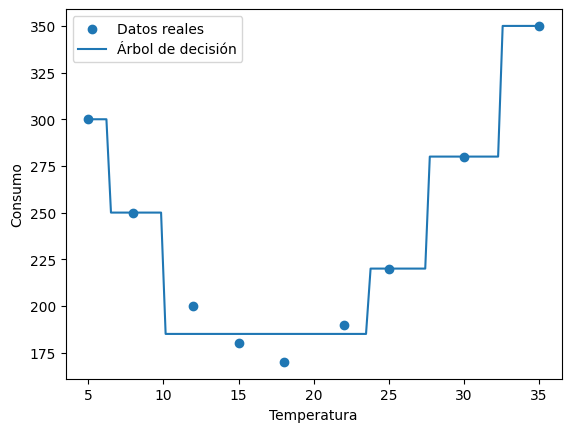

In [63]:
# Crear puntos más suaves para visualizar bien la curva
X_smooth = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 100),
    columns=["Temperatura"]
)

y_smooth = modelo_tree.predict(X_smooth)

plt.scatter(X, y, label="Datos reales")
plt.plot(X_smooth, y_smooth, label="Árbol de decisión")
plt.xlabel("Temperatura")
plt.ylabel("Consumo")
plt.legend()
plt.show()

## Random Forest para regresión

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temperatura = np.array([5, 8, 12, 15, 18, 22, 25, 30, 35])
consumo = np.array([300, 250, 200, 180, 170, 190, 220, 280, 350])

datos = pd.DataFrame({
    "Temperatura": temperatura,
    "Consumo": consumo
})

X = datos[["Temperatura"]]
y = datos["Consumo"]

In [65]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

modelo_rf.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

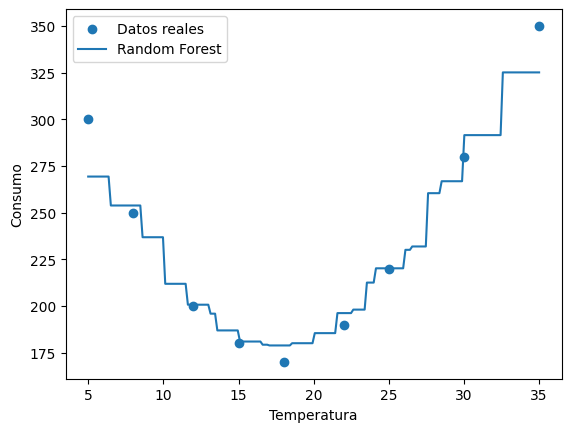

In [66]:
X_smooth = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 200),
    columns=["Temperatura"]
)

y_smooth = modelo_rf.predict(X_smooth)

plt.scatter(X, y, label="Datos reales")
plt.plot(X_smooth, y_smooth, label="Random Forest")
plt.xlabel("Temperatura")
plt.ylabel("Consumo")
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = modelo_rf.predict(X)

print("R²:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R²: 0.9369255615849196
MAE: 10.584259259259259


## Gradient Boosting para regresión

Tiempo de entrega vs Distancia

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

distancia = np.linspace(1, 20, 50)
tiempo = 2 * distancia + 0.5 * distancia**2 + np.random.normal(0, 10, 50)

datos = pd.DataFrame({
    "Distancia": distancia,
    "Tiempo": tiempo
})

X = datos[["Distancia"]]
y = datos["Tiempo"]

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

modelo_gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

modelo_gb.fit(X, y)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = modelo_gb.predict(X)

print("R²:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R²: 0.9999361008558226
MAE: 0.4513753726398139


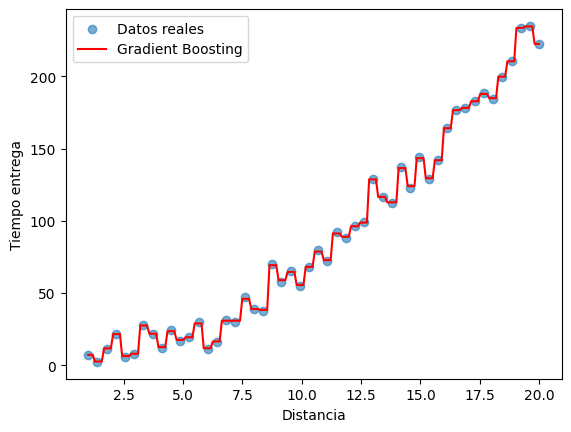

In [71]:
X_smooth = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 200),
    columns=["Distancia"]
)

y_smooth = modelo_gb.predict(X_smooth)

plt.scatter(X, y, alpha=0.6, label="Datos reales")
plt.plot(X_smooth, y_smooth, color="red", label="Gradient Boosting")
plt.xlabel("Distancia")
plt.ylabel("Tiempo entrega")
plt.legend()
plt.show()

## Support Vector Regression (SVR)

Relación no lineal (Distancia vs Tiempo)

Usaremos una relación ligeramente curva.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(1, 20, 50)
y = 2 * X + 0.5 * X**2 + np.random.normal(0, 8, 50)

datos = pd.DataFrame({
    "Distancia": X,
    "Tiempo": y
})

X = datos[["Distancia"]]
y = datos["Tiempo"]

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

modelo_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=100, epsilon=5))
])

modelo_svr.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('svr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [74]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = modelo_svr.predict(X)

print("R²:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R²: 0.9890909853463183
MAE: 5.898897115436248


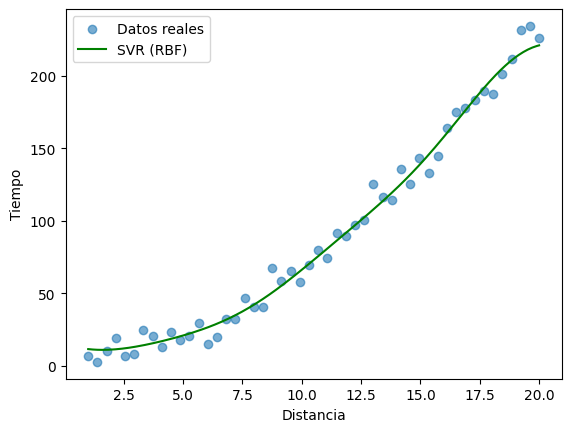

In [75]:
X_smooth = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 200),
    columns=["Distancia"]
)

y_smooth = modelo_svr.predict(X_smooth)

plt.scatter(X, y, alpha=0.6, label="Datos reales")
plt.plot(X_smooth, y_smooth, color="green", label="SVR (RBF)")
plt.xlabel("Distancia")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

## Redes neuronales para regresión

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(1, 20, 80)
y = 2 * X + 0.5 * X**2 + np.random.normal(0, 10, 80)

datos = pd.DataFrame({
    "Distancia": X,
    "Tiempo": y
})

X = datos[["Distancia"]]
y = datos["Tiempo"]

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

modelo_nn = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(50, 50),
        activation="relu",
        solver="adam",
        max_iter=5000,
        random_state=42
    ))
])

modelo_nn.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('mlp', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"loss loss: {'squared_error', 'poisson'}, default='squared_error'The loss function to use when training the weights. Note that the""squared error"" and ""poisson"" losses actually implement""half squares error"" and ""half poisson deviance"" to simplify thecomputation of the gradient. Furthermore, the ""poisson"" loss internally usesa log-link (exponential as the output activation function) and requires``y >= 0``... versionchanged:: 1.7 Added parameter `loss` and option 'poisson'.",'squared_error'
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(50, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_tr

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = modelo_nn.predict(X)

print("R²:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R²: 0.9851458984136756
MAE: 7.195842258731392


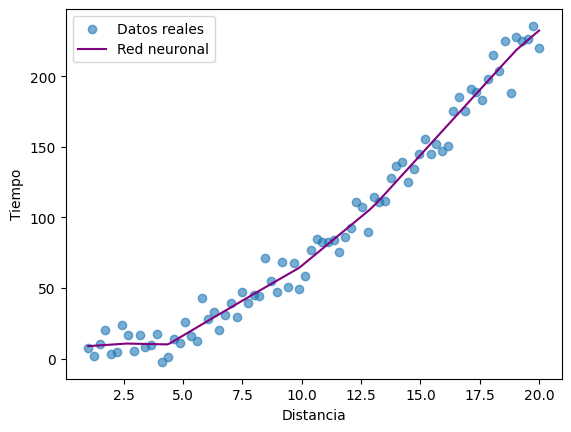

In [79]:
X_smooth = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 200),
    columns=["Distancia"]
)

y_smooth = modelo_nn.predict(X_smooth)

plt.scatter(X, y, alpha=0.6, label="Datos reales")
plt.plot(X_smooth, y_smooth, color="purple", label="Red neuronal")
plt.xlabel("Distancia")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

## Regresión con series temporales

C:\Users\cotec\AppData\Local\Temp\ipykernel_7984\1981072142.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2020-01-01", periods=60, freq="M")


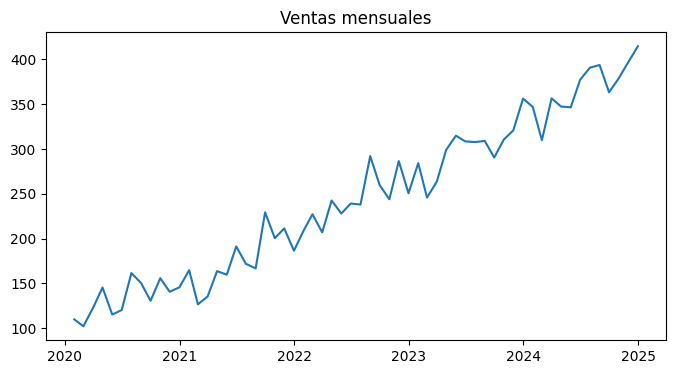

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

fechas = pd.date_range(start="2020-01-01", periods=60, freq="M")
ventas = 100 + np.arange(60)*5 + np.random.normal(0, 20, 60)

datos = pd.DataFrame({
    "Fecha": fechas,
    "Ventas": ventas
})

datos.set_index("Fecha", inplace=True)

plt.figure(figsize=(8,4))
plt.plot(datos.index, datos["Ventas"])
plt.title("Ventas mensuales")
plt.show()

In [81]:
datos["Tiempo"] = np.arange(len(datos))

In [82]:
train = datos.iloc[:48]   # primeros 4 años
test = datos.iloc[48:]    # último año

X_train = train[["Tiempo"]]
y_train = train["Ventas"]

X_test = test[["Tiempo"]]
y_test = test["Ventas"]

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

modelo_ts = LinearRegression()
modelo_ts.fit(X_train, y_train)

y_pred = modelo_ts.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.46836700162803746
MAE: 17.255788993908805


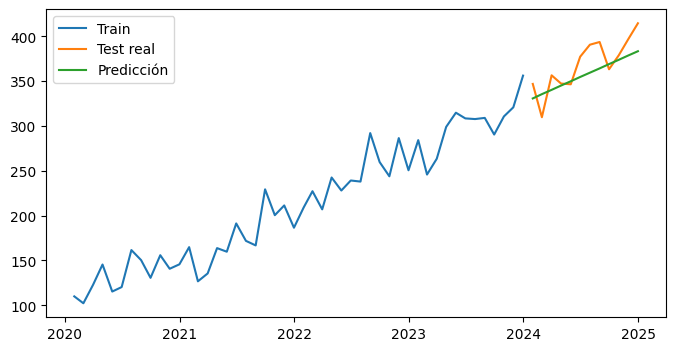

In [84]:
plt.figure(figsize=(8,4))
plt.plot(train.index, y_train, label="Train")
plt.plot(test.index, y_test, label="Test real")
plt.plot(test.index, y_pred, label="Predicción")
plt.legend()
plt.show()

## Live Coding

**Paso 0 — Cargar dataset**

In [85]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Paso 1 — Preprocesamiento (Pipeline)**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

pipe_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVR(kernel="rbf", C=10, epsilon=0.1))
])

pipe_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

**Paso 2 — Entrenar con Validación Cruzada**

In [87]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear": pipe_linear,
    "Ridge": pipe_ridge,
    "Polynomial": pipe_poly,
    "SVR": pipe_svr
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse = np.sqrt(-scores.mean())
    print(f"{name} RMSE CV: {rmse:.4f}")

Linear RMSE CV: 0.7206
Ridge RMSE CV: 0.7206
Polynomial RMSE CV: 3.2324
SVR RMSE CV: 0.5661


**Paso 3 — Entrenar final y comparar métricas en Test**

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))


Linear
RMSE: 0.7455813830127764
MAE: 0.5332001304956565
R2: 0.5757877060324508

Ridge
RMSE: 0.7455567442814779
MAE: 0.5331931195789734
R2: 0.5758157428913684

Polynomial
RMSE: 0.681396744804474
MAE: 0.4670009334696578
R2: 0.6456819729261818

SVR
RMSE: 0.5689439098797496
MAE: 0.3774452628267955
R2: 0.7529800406100777


**Paso 4 — Visualizar residuos**

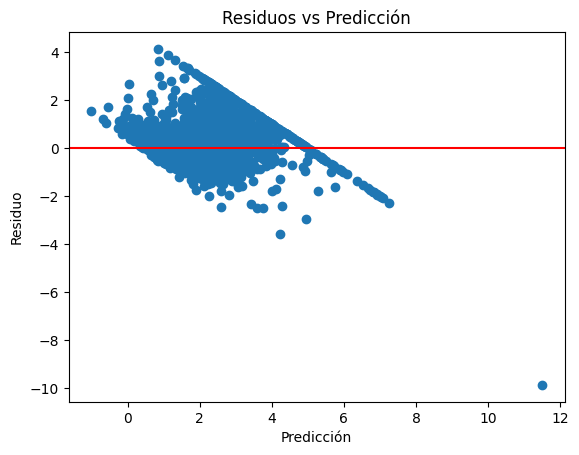

In [89]:
import matplotlib.pyplot as plt

best_model = pipe_ridge
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicción")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicción")
plt.show()

**Paso 5 — Regularización y comparación directa**

In [90]:
from sklearn.linear_model import RidgeCV

ridge_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas=[0.1, 1, 10, 100]))
])

ridge_cv.fit(X_train, y_train)
print("Mejor alpha:", ridge_cv.named_steps["model"].alpha_)

Mejor alpha: 1.0


**Paso 6 — SHAP**

In [91]:
import shap

pipe_ridge.fit(X_train, y_train)
explainer = shap.LinearExplainer(pipe_ridge.named_steps["model"],
                                  pipe_ridge.named_steps["scaler"].transform(X_train))
shap_values = explainer.shap_values(pipe_ridge.named_steps["scaler"].transform(X_test))

shap.summary_plot(shap_values, X_test)

ModuleNotFoundError: No module named 'shap'

**Paso 7 — Guardar modelo**

In [ ]:
import joblib

joblib.dump(pipe_ridge, "modelo_ridge.pkl")

['modelo_ridge.pkl']

**Paso 8 — Simular inferencia**

In [ ]:
modelo_cargado = joblib.load("modelo_ridge.pkl")
nueva_prediccion = modelo_cargado.predict(X_test.iloc[[0]])
print(nueva_prediccion)

[0.71947224]


***Un modelo no termina cuando lo evaluamos. Termina cuando puede vivir fuera del notebook.***

## Ejercicio

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1200
brands = ["Toyota","Hyundai","Kia","Chevrolet","Ford","Nissan","Mazda","Volkswagen","BMW","Audi"]
fuel = ["Gasolina","Diesel","Híbrido","Eléctrico"]
trans = ["Manual","Automática"]

year = np.random.randint(2005, 2025, n)
age = 2025 - year

km = (np.random.gamma(shape=2.2, scale=18000, size=n) + age*6000).astype(int)
km = np.clip(km, 0, 350000)

brand = np.random.choice(brands, n, p=[0.16,0.12,0.10,0.10,0.10,0.10,0.08,0.10,0.07,0.07])
fuel_type = np.random.choice(fuel, n, p=[0.72,0.12,0.10,0.06])
transmission = np.random.choice(trans, n, p=[0.45,0.55])

hp_base = {"Toyota":120,"Hyundai":110,"Kia":115,"Chevrolet":130,"Ford":140,"Nissan":125,"Mazda":135,"Volkswagen":145,"BMW":190,"Audi":200}
hp = np.array([hp_base[b] for b in brand]) + np.random.normal(0, 20, n)
hp = np.clip(hp, 70, 350).round(0)

# Precio base por marca + ajustes
brand_premium = {"Toyota":1.00,"Hyundai":0.88,"Kia":0.90,"Chevrolet":0.92,"Ford":0.95,"Nissan":0.93,"Mazda":0.97,"Volkswagen":1.02,"BMW":1.45,"Audi":1.50}
premium = np.array([brand_premium[b] for b in brand])

fuel_factor = {"Gasolina":1.00,"Diesel":1.05,"Híbrido":1.18,"Eléctrico":1.30}
ff = np.array([fuel_factor[f] for f in fuel_type])

trans_factor = {"Manual":0.97,"Automática":1.03}
tf = np.array([trans_factor[t] for t in transmission])

# Precio (en miles) con ruido + degradación por edad y km
price = (
    (18 + 0.08*hp) * premium * ff * tf
    - 0.55*age
    - 0.00003*km
    + np.random.normal(0, 2.2, n)
)

price = np.clip(price, 2.0, None)  # mínimo
price = (price*1000).round(0)      # a moneda (CLP/US$ da igual para demo)

df = pd.DataFrame({
    "anio": year,
    "marca": brand,
    "kilometraje": km,
    "combustible": fuel_type,
    "transmision": transmission,
    "potencia_hp": hp,
    "precio": price
})

# Inyectar nulos para practicar imputación
for col in ["potencia_hp", "combustible"]:
    mask = np.random.rand(n) < 0.03
    df.loc[mask, col] = np.nan

df.to_csv("autos.csv", index=False)
print("Listo: autos.csv guardado")
df.head()

Listo: autos.csv guardado


,anio,marca,kilometraje,combustible,transmision,potencia_hp,precio
0,2011,Toyota,90219,Diesel,Automática,134.0,25255.0
1,2024,Hyundai,76322,Eléctrico,Manual,75.0,23743.0
2,2019,Nissan,46477,Gasolina,Automática,127.0,22153.0
3,2015,Chevrolet,88337,Diesel,Automática,97.0,18774.0
4,2012,Chevrolet,135952,Diesel,Automática,80.0,15166.0


**Exploración rápida**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anio         1200 non-null   int64  
 1   marca        1200 non-null   object 
 2   kilometraje  1200 non-null   int64  
 3   combustible  1167 non-null   object 
 4   transmision  1200 non-null   object 
 5   potencia_hp  1166 non-null   float64
 6   precio       1200 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.8+ KB


In [ ]:
df.isnull().sum()

,0
anio,0
marca,0
kilometraje,0
combustible,33
transmision,0
potencia_hp,34
precio,0


In [ ]:
df.describe()

,anio,kilometraje,potencia_hp,precio
count,1200.000000,1200.000000,1166.000000,1200.000000
mean,2014.174167,103547.896667,134.350772,21899.844167
std,5.924504,44506.904435,33.608214,10319.070911
min,2005.000000,10777.000000,70.000000,4088.000000
25%,2009.000000,69987.250000,110.000000,15000.250000
50%,2014.000000,103082.500000,129.000000,19662.500000
75%,2019.000000,133356.750000,151.000000,25019.250000
max,2024.000000,263162.000000,259.000000,64894.000000


**Separar variables**

In [ ]:
X = df.drop(columns="precio")
y = df["precio"]

**Definir columnas**

In [ ]:
numeric_cols = ["anio", "kilometraje", "potencia_hp"]
categorical_cols = ["marca", "combustible", "transmision"]

**Construir preprocesamiento**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

**Modelos**

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe_linear = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

pipe_ridge = Pipeline([
    ("preprocess", preprocessor),
    ("model", Ridge())
])

pipe_svr = Pipeline([
    ("preprocess", preprocessor),
    ("model", SVR())
])

pipe_tree = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

**GridSearch**

In [ ]:
param_ridge = {
    "model__alpha": [0.1, 1, 10, 100]
}

param_svr = {
    "model__C": [1, 10],
    "model__epsilon": [0.1, 1]
}

grid_ridge = GridSearchCV(pipe_ridge, param_ridge, cv=5, scoring="neg_mean_squared_error")
grid_svr = GridSearchCV(pipe_svr, param_svr, cv=5, scoring="neg_mean_squared_error")

**Train/Test split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Entrenar modelos**

In [ ]:
models = {
    "Linear": pipe_linear,
    "Ridge": grid_ridge,
    "SVR": grid_svr,
    "Tree": pipe_tree
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

In [ ]:
pd.DataFrame(results).T

**Analizar residuos del mejor modelo**

In [ ]:
best_model = grid_ridge

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicción")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicción")
plt.show()

**Importancia de variables (Árbol)**

In [ ]:
pipe_tree.fit(X_train, y_train)

importances = pipe_tree.named_steps["model"].feature_importances_

feature_names = pipe_tree.named_steps["preprocess"].get_feature_names_out()

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

imp_df.head(10)